# Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from melp import Detector
import melp.taft
#from melp.taft import get_median_from_hist, read_histo, select

Welcome to JupyROOT 6.24/06


## Creating/Loading detector with misalignment

In [4]:
mu3e_detector = Detector.initFromROOT("./run42_20000.root")
#mu3e_detector = Detector.initFromSave("calibration_iteration2_v1.det")
#mu3e_detector = Detector.initFromSave("test_det.dev")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
melp.taft.select(mu3e_detector)

In [6]:
histogram = melp.taft.read_histo('/run/media/maximilian/Volume/merged.root')

In [7]:
station_test = 300000

In [8]:
time_of_flight_arr = []

for z in range(len(mu3e_detector.TileDetector.row_ids(0, station_test))):
    tmp_arr = []
    for id in mu3e_detector.TileDetector.column_ids(z, station_test):
        prob = np.array([0.5])
        # q for result (has to be np.array because of type casting)
        q = np.array([0.])
        histogram[id][0].GetQuantiles(1, q, prob)
        
        tmp_arr.append(q[0])
    
    time_of_flight_arr.append(tmp_arr)

Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero


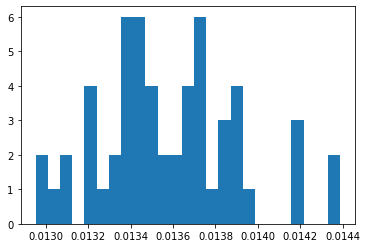

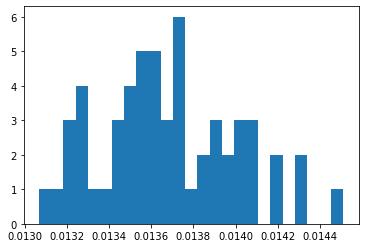

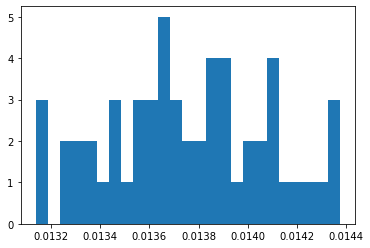

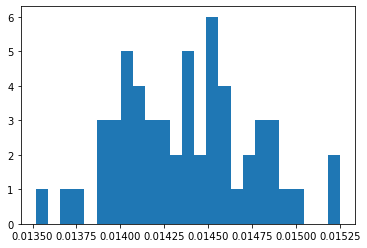

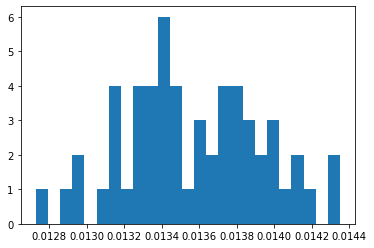

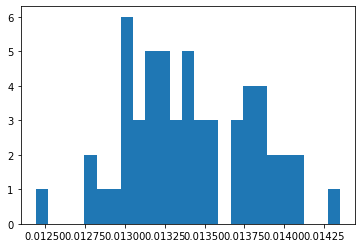

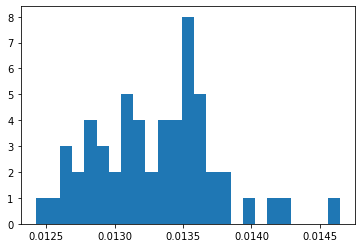

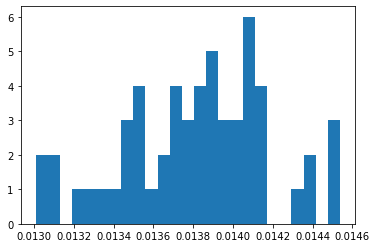

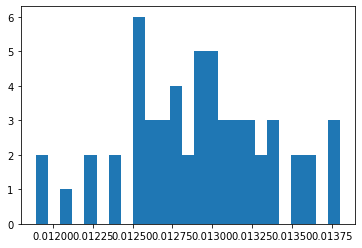

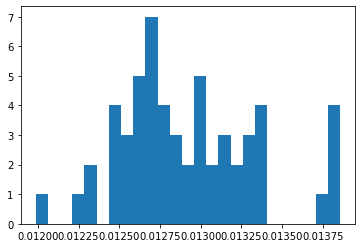

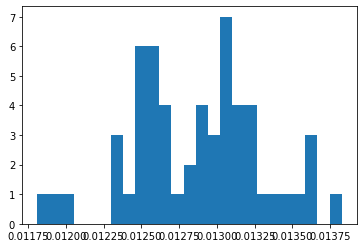

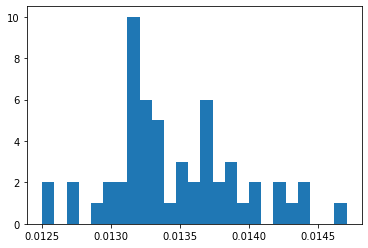

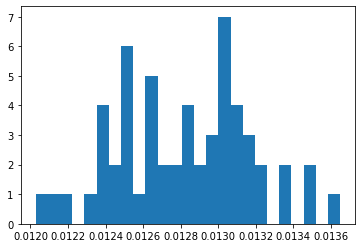

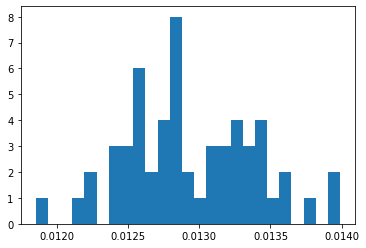

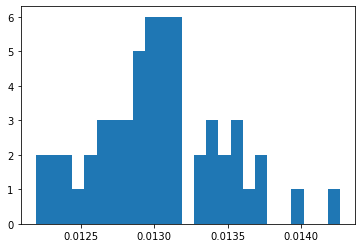

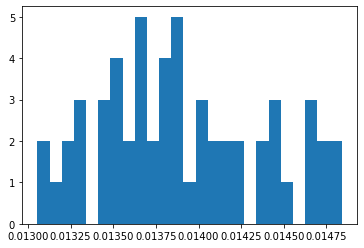

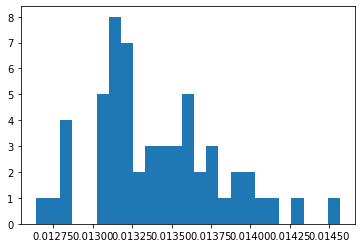

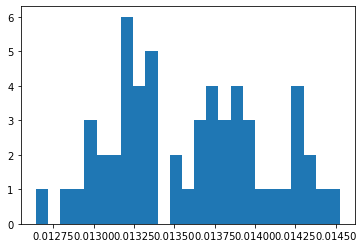

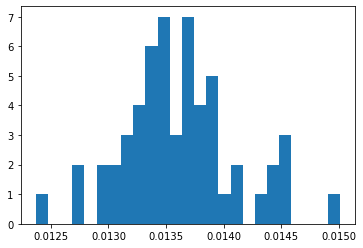

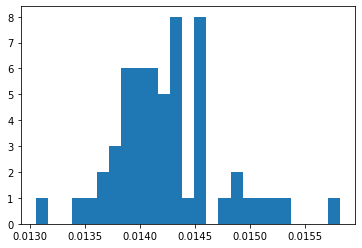

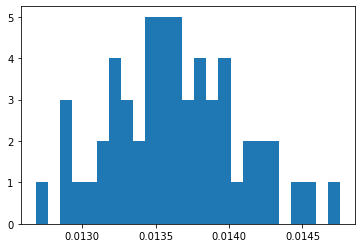

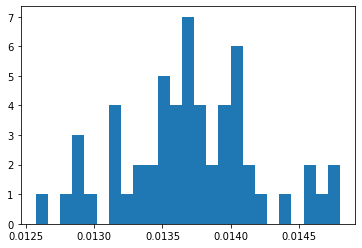

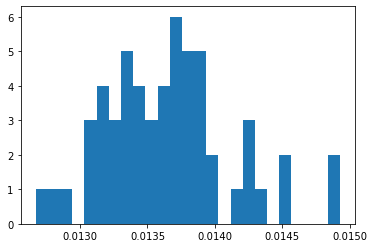

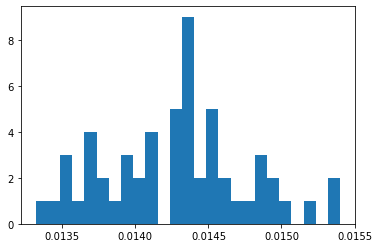

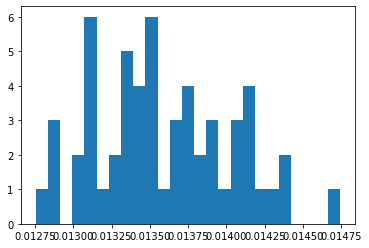

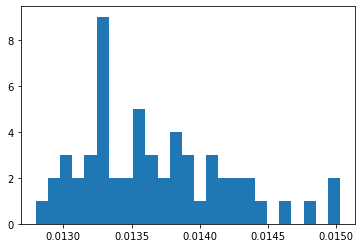

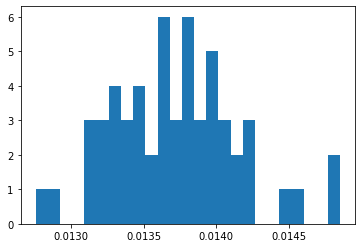

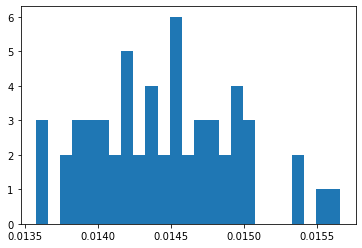

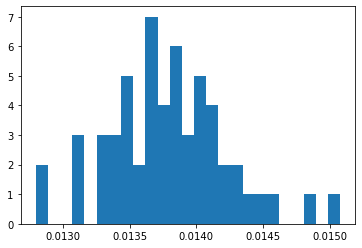

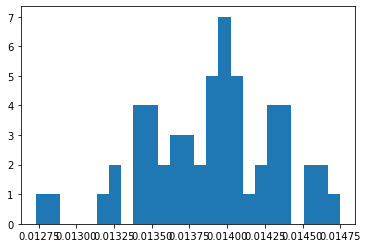

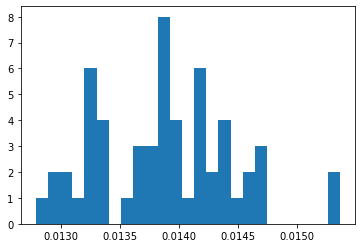

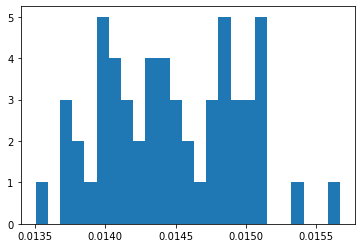

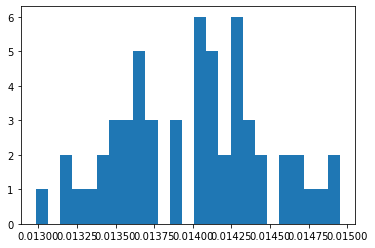

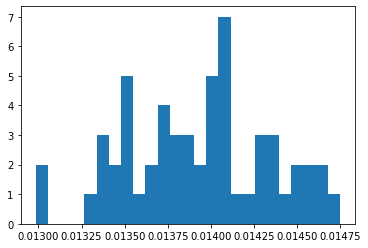

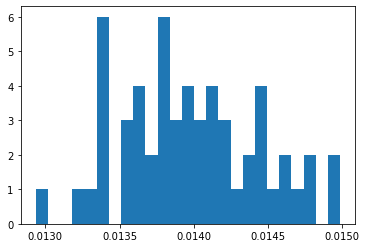

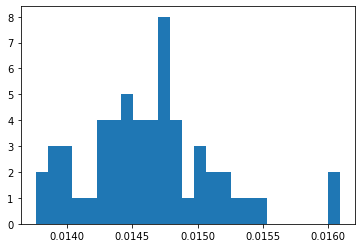

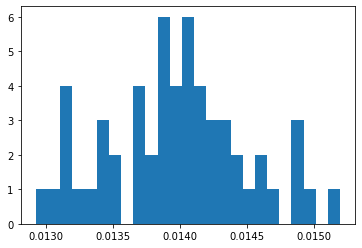

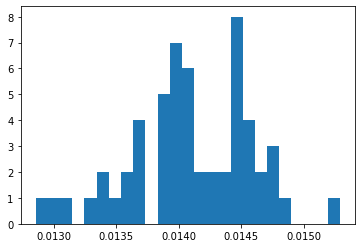

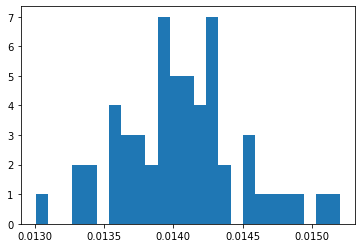

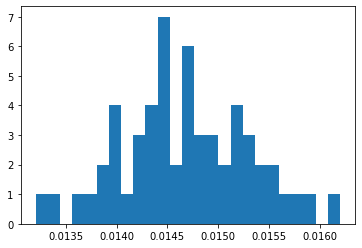

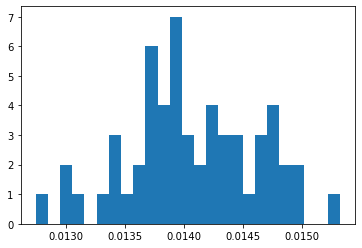

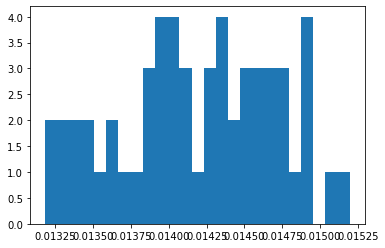

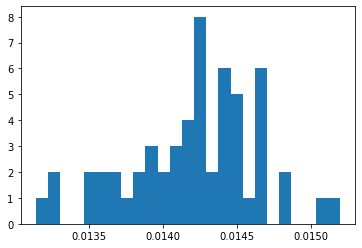

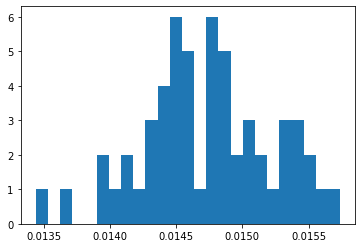

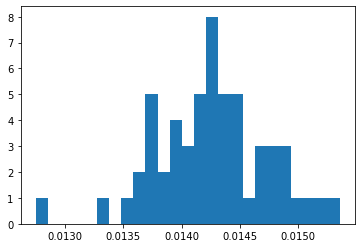

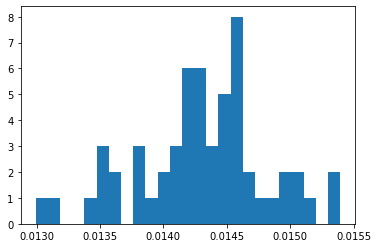

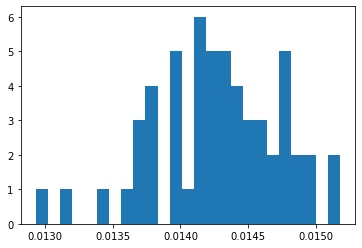

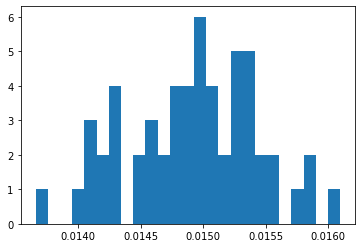

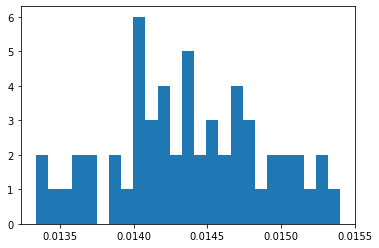

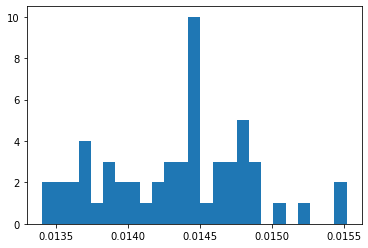

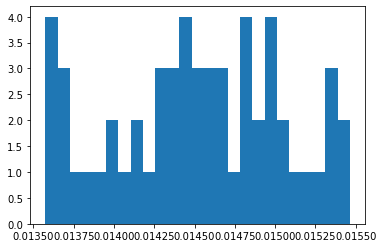

In [9]:
mean = []
pos = []
pos_z = []

for z in range(len(mu3e_detector.TileDetector.row_ids(0, station_test))-1):
    plt.hist(time_of_flight_arr[z], bins=25)
    plt.show()
    z_pos = mu3e_detector.TileDetector.tile[mu3e_detector.TileDetector.column_ids(z, station_test)[0]].pos
    pos.append(z_pos[2])
    pos_z.append(z_pos)
    mean.append(np.mean(time_of_flight_arr[z]))

time in phi direction
$$
\frac{\tan{(18^\circ)} \cdot 0.25 cm}{ c} \approx 2.67 ps
$$
time in z direction
$$
\frac{0.25cm \cdot \cos{(\alpha(z))}}{c}
$$

--> correct formula:
$$
l_{tof} = \sqrt{\left(\tan{(18^\circ)} \cdot 0.25 cm\right)^2 \cdot \left(0.25cm \cdot \cos{(\alpha(z))}\right)^2}
$$

with $\alpha(z) \approx \left(\frac{25^\circ}{328.8cm} * z\right) * \frac{\pi}{180^\circ}$

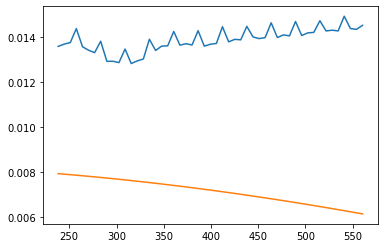

In [14]:
plt.plot(pos,mean)

tof_corr = []
for z in pos_z:
    #tof_corr.append(melp.taft.tof_z_graf(z)-0.02)
    tof_corr.append(-melp.taft.tof_z_new(z))#-0.00267)
    
plt.plot(pos, tof_corr)
plt.show()

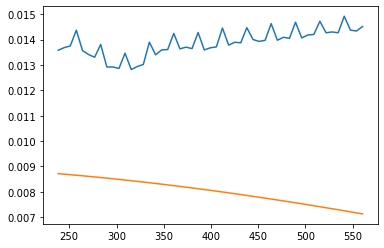

In [13]:
plt.plot(pos,mean)

tof_corr = []
for z in pos_z:
    #tof_corr.append(melp.taft.tof_z_graf(z)-0.02)
    tof_corr.append(melp.taft.tof_z_new_better(z))
    
plt.plot(pos, tof_corr)
plt.show()

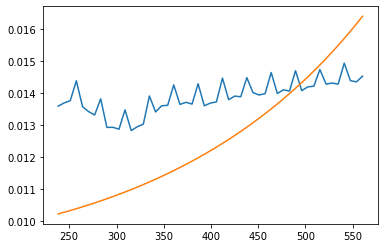

In [15]:
plt.plot(pos,mean)

tof_corr = []
for z in pos_z:
    tof_corr.append(melp.taft.tof_z_graf(z))
    #tof_corr.append(-melp.taft.tof_z_new(z))
    
plt.plot(pos, tof_corr)
plt.show()